In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples
from unidecode import unidecode
import matplotlib.cm as cm

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data_completa = pd.read_csv("data_completa.csv")
data_completa

,id_jugador,nombre_jugador,version_x,posiciones,est_general_x,valor_de_mercado,salario_semanal,edad,nacimiento,altura,id_equipo,nombre_club_x,id_liga_x,nombre_liga_x,posicion_club,id_nacionalidad_x,nacionalidad,pierna,ritmo,chut,pase,regate,defensa_x,fisico,centros_ataque,finalizacion,remate_cabeza,pase_corto_ataque,volea,habilidad_regate,efecto,eficacia_faltas,habilidad_pase_largo,habilidad_control,aceleracion,velocidad_max,agilidad,reaccion,equilibrio,potencia_tiro,potencia_salto,aguante,fortaleza,fuerza_chuts_lejanos,agresividad,anticipacion,posicionamiento,vision_juego,penalties,marcaje,abordaje,entrada,estirada,manejo,pateo,posicion_por,reflejos,velocidad_por,del_izq,del,del_dch,extr_izq,seg_del_izq,media_punta,seg_del_dch,extr_dch,med_cen_def_izq,med_cen_of,med_cen_of_izq,med_izq,med_cen_izq,med_cen,med_cen_dch,med_dch,carr_izq,med_def_izq,med_cen_def,med_cen_def_dch,carr_dch,lat_izq,def_cen_izq,def_cen,def_cen_dch,lat_dch,portero,nombre_club_y,version_y,id_liga_y,nombre_liga_y,id_nacionalidad_y,nacion_liga,est_general_y,ataque,mediocampo,defensa_y,promedio_edad_titulares,promedio_edad_equipo,cluster,categoria
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,1982-01-05,181,55.0,Udinese,31,Serie A,LM,27,Italia,Izq,71,59,66,66,71,73,76,49,59,68,57,63,67,59,68,69,68,73,67,72,67,73,67,77,69,67,77,72,63,51,49,70,73,73,13,4,14,9,11,10,63,63,63,67,64,64,64,67,64,64,64,68,67,67,67,68,71,69,69,69,71,72,70,70,70,72,13,udinese calcio,2015.0,31.0,serie a,27.0,italia,74.0,75.0,72.0,74.0,26.18,24.97,2,Estrellas
1,11,Romain Rocchi,2015,"MEC, MCD",68,675000,8000,32,1981-10-02,183,68.0,Metz,16,Ligue 1,RDM,18,Francia,Dch,52,62,69,68,56,69,64,54,60,73,61,65,69,49,69,73,53,52,74,68,63,72,70,54,79,71,63,63,64,72,65,46,59,57,6,7,10,7,12,8,63,63,63,66,66,66,66,66,69,69,69,66,68,68,68,66,62,65,65,65,62,60,62,62,62,60,12,fc metz,2015.0,16.0,ligue 1,18.0,francia,69.0,70.0,70.0,68.0,27.91,24.47,2,Estrellas
2,27,Joe Cole,2015,"MED, MCO",74,2400000,35000,32,1981-11-08,176,2.0,Aston Villa,13,Premier League,SUB,14,Inglaterra,Dch,60,70,78,80,36,55,81,69,52,79,75,80,83,76,68,82,62,59,77,72,82,72,58,33,60,71,68,38,72,81,65,34,33,29,8,5,12,15,6,9,70,70,70,76,72,72,72,76,76,76,76,74,68,68,68,74,56,59,59,59,56,50,48,48,48,50,12,aston villa,2015.0,13.0,premier league,14.0,inglaterra,74.0,76.0,74.0,73.0,26.00,24.64,2,Estrellas
3,28,Manuel Herrera Yague,2015,POR,76,4300000,45000,32,1981-09-29,180,468.0,Elche,53,La Liga 2,SUB,45,Espana,Izq,36,38,40,45,48,48,25,25,25,21,25,25,25,25,22,34,41,49,55,66,60,30,78,32,60,25,36,25,25,25,25,25,25,25,75,74,68,77,80,45,33,33,33,32,32,32,32,32,31,31,31,31,29,29,29,31,31,32,32,32,31,31,34,34,34,31,76,elche cf,2015.0,53.0,la liga 2,45.0,espana,72.0,72.0,71.0,72.0,25.91,24.62,3,Otros
4,41,Andres Iniesta Lujan,2015,"MEC, EXI",89,36000000,250000,30,1984-05-11,170,241.0,FC Barcelona,53,La Liga,LCM,45,Espana,Dch,75,72,89,91,59,63,85,73,54,93,74,92,80,70,89,94,76,75,83,90,86,65,54,78,59,75,58,68,87,93,71,57,57,56,6,13,6,13,7,9,77,77,77,87,82,82,82,87,88,88,88,88,86,86,86,88,76,77,77,77,76,70,63,63,63,70,14,fc barcelona,2015.0,53.0,la liga,45.0,espana,84.0,87.0,84.0,81.0,27.27,25.72,2,Estrellas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,278132,Rakan Al Kaabi,2024,"MCD, MEC",54,250000,2000,20,2002-12-02,174,113057.0,Al Fayha,350,Pro League,RES,183,Arabia Saudita,Dch,66,34,44,49,54,63,37,30,48,50,33,47,32,37,49,45,62,69,59,46,75,49,56,74,60,28,57,52,33,43,35,55,57,56,13,12,6,8,5,8,44,44,44,45,44,44,44,45,45,45,45,47,47,47,47,47,53,53,53,53,53,54,54,54,54,54,13,al fayha,2018.0,350.0,pro league,183.0,arabia saudita,66.0,66.0,67.0,61.0,26.36,26.82,1,Secundarios
180017,278138,Josh 

In [5]:
data_completa["nombre_liga_x"] = data_completa["nombre_liga_x"].apply(unidecode)

In [6]:
data_completa

,id_jugador,nombre_jugador,version_x,posiciones,est_general_x,valor_de_mercado,salario_semanal,edad,nacimiento,altura,id_equipo,nombre_club_x,id_liga_x,nombre_liga_x,posicion_club,id_nacionalidad_x,nacionalidad,pierna,ritmo,chut,pase,regate,defensa_x,fisico,centros_ataque,finalizacion,remate_cabeza,pase_corto_ataque,volea,habilidad_regate,efecto,eficacia_faltas,habilidad_pase_largo,habilidad_control,aceleracion,velocidad_max,agilidad,reaccion,equilibrio,potencia_tiro,potencia_salto,aguante,fortaleza,fuerza_chuts_lejanos,agresividad,anticipacion,posicionamiento,vision_juego,penalties,marcaje,abordaje,entrada,estirada,manejo,pateo,posicion_por,reflejos,velocidad_por,del_izq,del,del_dch,extr_izq,seg_del_izq,media_punta,seg_del_dch,extr_dch,med_cen_def_izq,med_cen_of,med_cen_of_izq,med_izq,med_cen_izq,med_cen,med_cen_dch,med_dch,carr_izq,med_def_izq,med_cen_def,med_cen_def_dch,carr_dch,lat_izq,def_cen_izq,def_cen,def_cen_dch,lat_dch,portero,nombre_club_y,version_y,id_liga_y,nombre_liga_y,id_nacionalidad_y,nacion_liga,est_general_y,ataque,mediocampo,defensa_y,promedio_edad_titulares,promedio_edad_equipo,cluster,categoria
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,1982-01-05,181,55.0,Udinese,31,Serie A,LM,27,Italia,Izq,71,59,66,66,71,73,76,49,59,68,57,63,67,59,68,69,68,73,67,72,67,73,67,77,69,67,77,72,63,51,49,70,73,73,13,4,14,9,11,10,63,63,63,67,64,64,64,67,64,64,64,68,67,67,67,68,71,69,69,69,71,72,70,70,70,72,13,udinese calcio,2015.0,31.0,serie a,27.0,italia,74.0,75.0,72.0,74.0,26.18,24.97,2,Estrellas
1,11,Romain Rocchi,2015,"MEC, MCD",68,675000,8000,32,1981-10-02,183,68.0,Metz,16,Ligue 1,RDM,18,Francia,Dch,52,62,69,68,56,69,64,54,60,73,61,65,69,49,69,73,53,52,74,68,63,72,70,54,79,71,63,63,64,72,65,46,59,57,6,7,10,7,12,8,63,63,63,66,66,66,66,66,69,69,69,66,68,68,68,66,62,65,65,65,62,60,62,62,62,60,12,fc metz,2015.0,16.0,ligue 1,18.0,francia,69.0,70.0,70.0,68.0,27.91,24.47,2,Estrellas
2,27,Joe Cole,2015,"MED, MCO",74,2400000,35000,32,1981-11-08,176,2.0,Aston Villa,13,Premier League,SUB,14,Inglaterra,Dch,60,70,78,80,36,55,81,69,52,79,75,80,83,76,68,82,62,59,77,72,82,72,58,33,60,71,68,38,72,81,65,34,33,29,8,5,12,15,6,9,70,70,70,76,72,72,72,76,76,76,76,74,68,68,68,74,56,59,59,59,56,50,48,48,48,50,12,aston villa,2015.0,13.0,premier league,14.0,inglaterra,74.0,76.0,74.0,73.0,26.00,24.64,2,Estrellas
3,28,Manuel Herrera Yague,2015,POR,76,4300000,45000,32,1981-09-29,180,468.0,Elche,53,La Liga 2,SUB,45,Espana,Izq,36,38,40,45,48,48,25,25,25,21,25,25,25,25,22,34,41,49,55,66,60,30,78,32,60,25,36,25,25,25,25,25,25,25,75,74,68,77,80,45,33,33,33,32,32,32,32,32,31,31,31,31,29,29,29,31,31,32,32,32,31,31,34,34,34,31,76,elche cf,2015.0,53.0,la liga 2,45.0,espana,72.0,72.0,71.0,72.0,25.91,24.62,3,Otros
4,41,Andres Iniesta Lujan,2015,"MEC, EXI",89,36000000,250000,30,1984-05-11,170,241.0,FC Barcelona,53,La Liga,LCM,45,Espana,Dch,75,72,89,91,59,63,85,73,54,93,74,92,80,70,89,94,76,75,83,90,86,65,54,78,59,75,58,68,87,93,71,57,57,56,6,13,6,13,7,9,77,77,77,87,82,82,82,87,88,88,88,88,86,86,86,88,76,77,77,77,76,70,63,63,63,70,14,fc barcelona,2015.0,53.0,la liga,45.0,espana,84.0,87.0,84.0,81.0,27.27,25.72,2,Estrellas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,278132,Rakan Al Kaabi,2024,"MCD, MEC",54,250000,2000,20,2002-12-02,174,113057.0,Al Fayha,350,Pro League,RES,183,Arabia Saudita,Dch,66,34,44,49,54,63,37,30,48,50,33,47,32,37,49,45,62,69,59,46,75,49,56,74,60,28,57,52,33,43,35,55,57,56,13,12,6,8,5,8,44,44,44,45,44,44,44,45,45,45,45,47,47,47,47,47,53,53,53,53,53,54,54,54,54,54,13,al fayha,2018.0,350.0,pro league,183.0,arabia saudita,66.0,66.0,67.0,61.0,26.36,26.82,1,Secundarios
180017,278138,Josh 

## Filtrar datos por Categoría

In [8]:
data_filtrada = data_completa.loc[data_completa["categoria"] == "Secundarios"]
data_filtrada

,id_jugador,nombre_jugador,version_x,posiciones,est_general_x,valor_de_mercado,salario_semanal,edad,nacimiento,altura,id_equipo,nombre_club_x,id_liga_x,nombre_liga_x,posicion_club,id_nacionalidad_x,nacionalidad,pierna,ritmo,chut,pase,regate,defensa_x,fisico,centros_ataque,finalizacion,remate_cabeza,pase_corto_ataque,volea,habilidad_regate,efecto,eficacia_faltas,habilidad_pase_largo,habilidad_control,aceleracion,velocidad_max,agilidad,reaccion,equilibrio,potencia_tiro,potencia_salto,aguante,fortaleza,fuerza_chuts_lejanos,agresividad,anticipacion,posicionamiento,vision_juego,penalties,marcaje,abordaje,entrada,estirada,manejo,pateo,posicion_por,reflejos,velocidad_por,del_izq,del,del_dch,extr_izq,seg_del_izq,media_punta,seg_del_dch,extr_dch,med_cen_def_izq,med_cen_of,med_cen_of_izq,med_izq,med_cen_izq,med_cen,med_cen_dch,med_dch,carr_izq,med_def_izq,med_cen_def,med_cen_def_dch,carr_dch,lat_izq,def_cen_izq,def_cen,def_cen_dch,lat_dch,portero,nombre_club_y,version_y,id_liga_y,nombre_liga_y,id_nacionalidad_y,nacion_liga,est_general_y,ataque,mediocampo,defensa_y,promedio_edad_titulares,promedio_edad_equipo,cluster,categoria
5,57,Mladen Kascelan,2015,"MCD, LAD",63,190000,2000,31,1983-02-13,178,110756.0,Arsenal Tula,67,Premier League,LDM,15,Montenegro,Dch,67,43,53,50,63,81,46,37,66,63,49,41,34,36,57,55,68,66,60,57,78,46,77,89,74,48,87,61,48,49,46,60,65,69,9,9,9,10,8,9,51,51,51,52,51,51,51,52,52,52,52,55,57,57,57,55,61,63,63,63,61,65,67,67,67,65,12,arsenal tula,2015.0,67.0,premier league,40.0,rusia,62.0,62.0,60.0,62.0,28.91,28.04,1,Secundarios
11,630,David Wright,2015,MCD,61,50000,3000,34,1980-05-01,180,1935.0,Colchester United,60,League Two,SUB,14,Inglaterra,Dch,52,27,51,53,65,67,50,21,62,56,21,50,32,35,54,56,51,53,51,69,54,31,71,60,71,29,66,69,35,49,45,64,64,61,13,15,15,13,7,12,42,42,42,49,44,44,44,49,48,48,48,53,54,54,54,53,59,61,61,61,59,62,64,64,64,62,16,colchester united,2015.0,60.0,league two,14.0,inglaterra,61.0,62.0,61.0,60.0,21.55,22.25,1,Secundarios
14,768,Felipe Dal Bello,2015,CEN,70,1300000,20000,29,1984-07-31,178,50.0,Parma,31,Serie B,LCB,54,Brasil,Izq,52,39,58,60,72,64,50,29,65,70,23,51,48,25,64,71,50,53,62,68,71,67,76,55,67,40,64,74,33,49,39,70,74,74,10,5,7,8,4,6,49,49,49,54,52,52,52,54,55,55,55,57,60,60,60,57,66,67,67,67,66,67,70,70,70,67,11,parma,2015.0,31.0,serie b,27.0,italia,73.0,74.0,70.0,71.0,27.55,27.00,1,Secundarios
15,887,Nathan Clarke,2015,CEN,62,230000,4000,30,1983-07-30,185,1958.0,Leyton Orient,60,League One,RCB,14,Inglaterra,Dch,52,25,43,38,63,70,35,22,66,51,26,31,34,42,35,42,54,50,43,60,54,26,59,64,77,22,61,60,44,47,31,61,65,63,9,5,10,15,9,9,40,40,40,41,40,40,40,41,42,42,42,44,47,47,47,44,53,55,55,55,53,58,62,62,62,58,13,leyton orient,2015.0,60.0,league one,14.0,inglaterra,65.0,66.0,64.0,64.0,26.64,25.00,1,Secundarios
18,1178,Paolo Cannavaro,2015,CEN,74,1500000,25000,33,1981-06-26,185,111974.0,Sassuolo,31,Serie A,SUB,27,Italia,Dch,43,48,54,52,76,70,43,39,77,61,37,44,23,28,67,59,34,51,60,67,50,71,80,49,76,50,77,79,39,59,51,74,75,73,13,7,4,13,4,8,53,53,53,50,53,53,53,50,54,54,54,53,60,60,60,53,63,68,68,68,63,67,74,74,74,67,13,us sassuolo calcio,2015.0,31.0,serie a,27.0,italia,72.0,74.0,70.0,71.0,25.73,26.93,1,Secundarios
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180012,278126,Selvi Clua Oya,2024,"MCD, MEC",61,725000,1000,18,2005-01-29,189,110062.0,Girona,53,La Liga,RES,45,Espana,Izq,56,33,57,46,61,53,42,30,48,65,22,32,43,45,62,60,55,57,62,57,50,45,49,50,54,27,55,61,38,60,46,58,66,63,15,14,10,8,11,11,45,45,45,47,47,47,47,47,51,51,51,50,55,55,55,50,56,60,60,60,56,58,59,59,59,58,17,girona fc,2015.0,54.0,la liga,45.0,espana,66.0,65.0,66.0,66.0,28.18,25.04,1,Secu

In [75]:
data_filtrada.to_csv('Secundarios.csv', index=False)

In [10]:
data_filtrada.shape

(52488, 99)

## Cantidad de Jugadores por Temporada

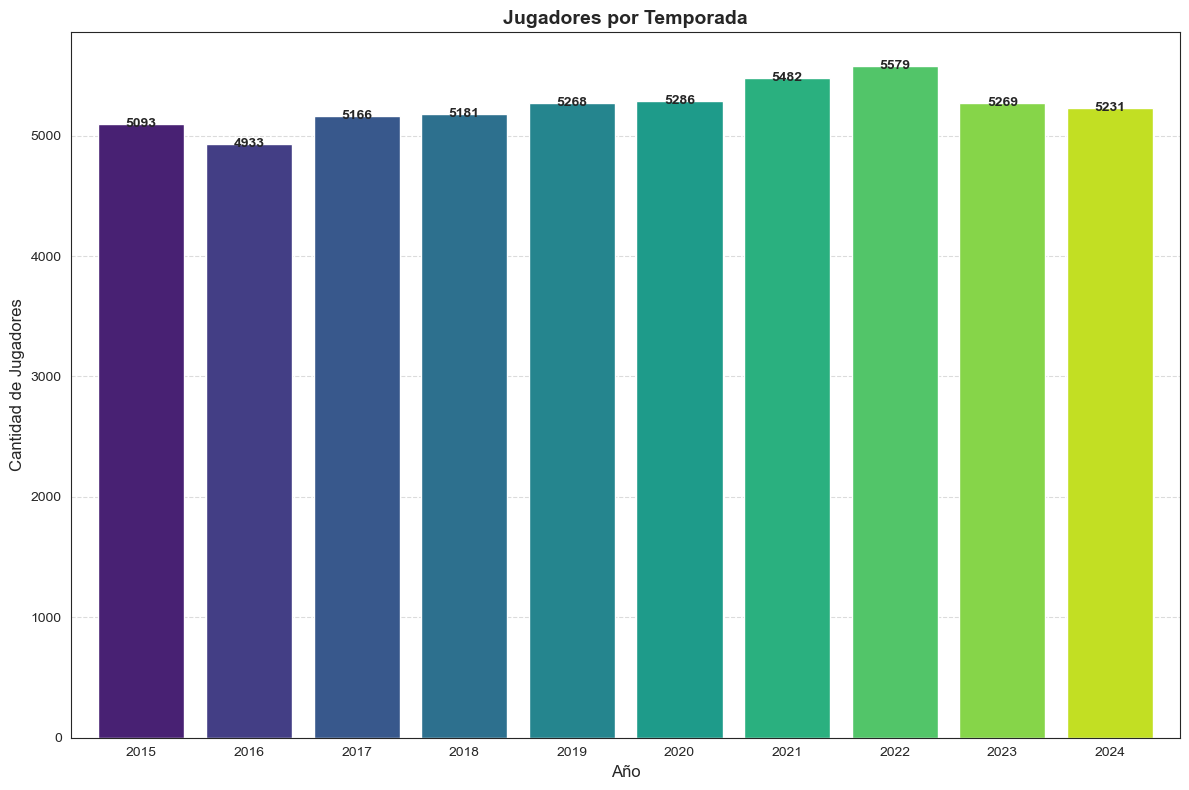

In [81]:
jug_por_año = data_filtrada.groupby('version_x').size()

# Personalización del gráfico
plt.figure(figsize=(12, 8))  # Ajustar el tamaño si es necesario
sns.color_palette("viridis", n_colors=10)  # Paleta de colores similar a la imagen
ax = jug_por_año.plot(kind='bar', width=0.8, color=sns.color_palette("viridis", n_colors=10))

# Etiquetas y títulos
ax.set_title('Jugadores por Temporada', fontsize=14, fontweight='bold')
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Cantidad de Jugadores', fontsize=12)
ax.set_xticklabels(jug_por_año.index, rotation=0)  # Rotar etiquetas del eje x

# Colocar valores numéricos encima de las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Distribucion de la Edad

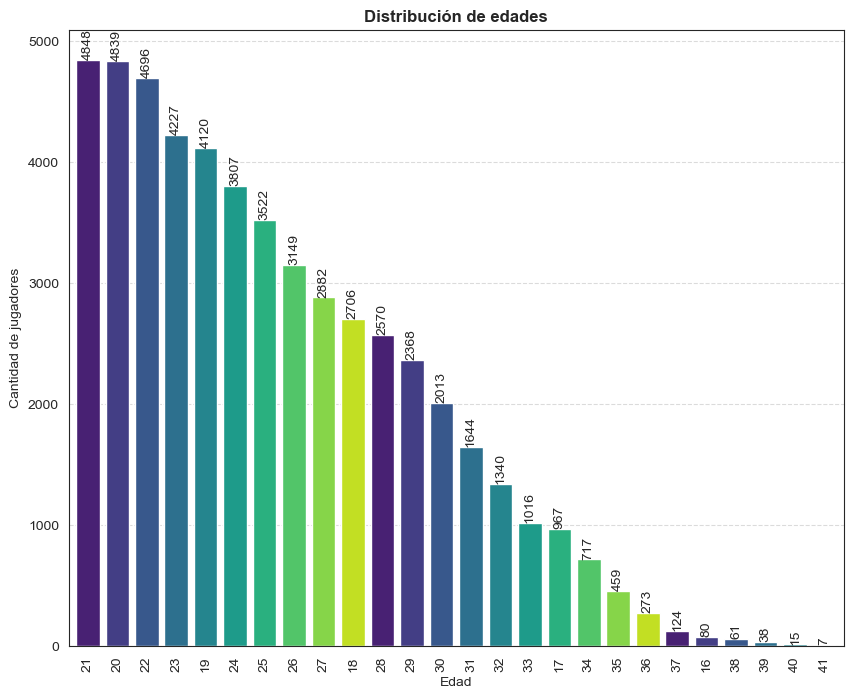

In [79]:
contar_edad = data_filtrada['edad'].value_counts()

plt.figure(figsize=(10, 8))
ax = contar_edad.plot(kind='bar', width=0.8, color=sns.color_palette("viridis", n_colors=10))
ax.bar_label(ax.containers[0],rotation=90)

plt.title('Distribución de edades', fontweight='bold')
plt.xlabel('Edad')
plt.ylabel('Cantidad de jugadores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Nacionalidades con mayor prescencia de jugadores

In [16]:
nacionalidades_contadas = data_filtrada['nacionalidad'].value_counts()
top_5_nacionalidades = nacionalidades_contadas.head(5)
print(top_5_nacionalidades)


nacionalidad
Inglaterra    5506
Alemania      3117
Francia       2906
Argentina     2372
Espana        2348
Name: count, dtype: int64


## Valor de mercado por nacionalidad y temporada

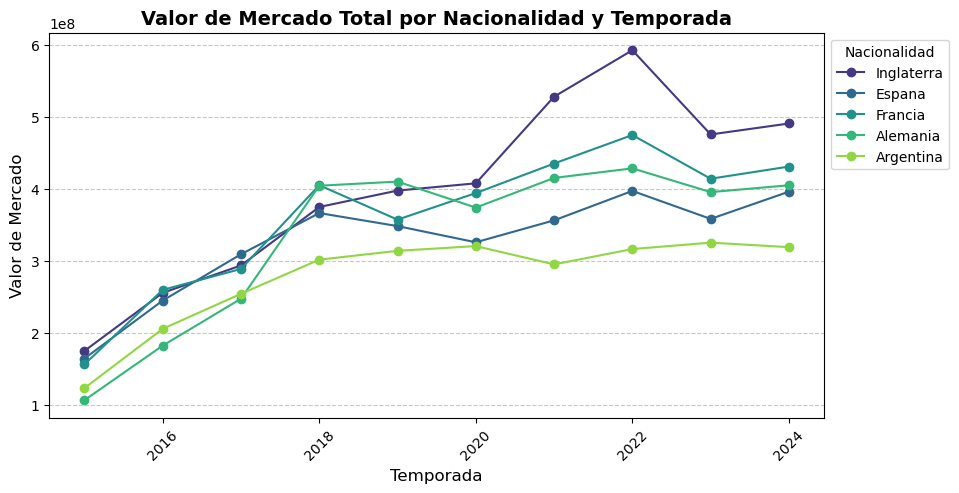

In [18]:
# Filtrar los datos por las nacionalidades seleccionadas y agrupar por 'nacionalidad' y 'version_x'
nacionalidades_seleccionadas = [
    "Inglaterra", "Espana", "Francia", "Alemania", "Argentina"
]
datos_filtrados = data_filtrada[data_filtrada['nacionalidad'].isin(nacionalidades_seleccionadas)]
datos_agrupados_por_version = datos_filtrados.groupby(['nacionalidad', 'version_x'])['valor_de_mercado'].sum().reset_index()
# Reorganizar los datos en una tabla pivote para facilitar la visualización
datos_pivoteados = datos_agrupados_por_version.pivot(index='version_x', columns='nacionalidad', values='valor_de_mercado').reindex(columns=nacionalidades_seleccionadas)

# Crear una paleta viridis con tantos colores como nacionalidades seleccionadas
viridis_palette = sns.color_palette('viridis', n_colors=len(nacionalidades_seleccionadas))

# Graficar un gráfico de líneas para cada nacionalidad
plt.figure(figsize=(10, 5))
for i, nacionalidad in enumerate(datos_pivoteados.columns):
    plt.plot(datos_pivoteados.index, datos_pivoteados[nacionalidad], marker='o', label=nacionalidad, color=viridis_palette[i])


plt.title('Valor de Mercado Total por Nacionalidad y Temporada', fontsize=14, fontweight='bold')
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Valor de Mercado', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Nacionalidad', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

## Salario por Nacionalidad y Temporada

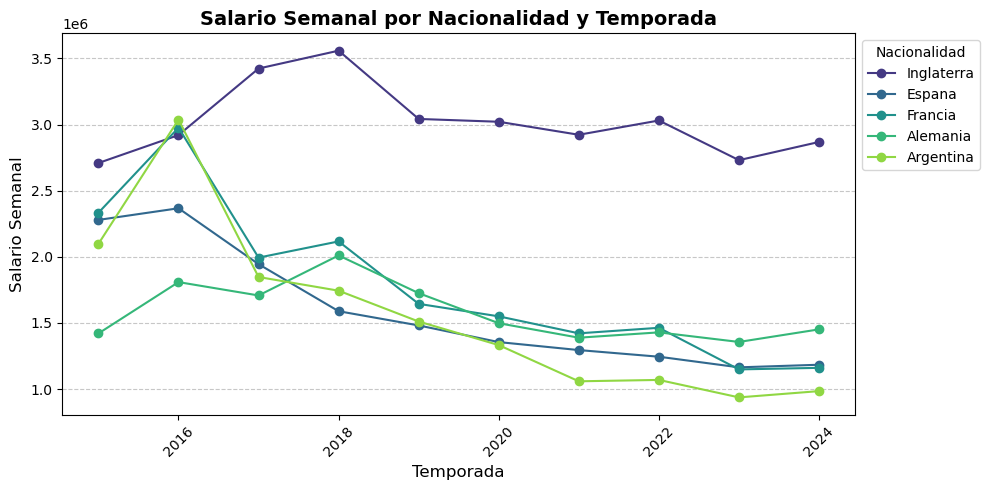

In [20]:
nacionalidades_seleccionadas = [
    "Inglaterra", "Espana", "Francia", "Alemania", "Argentina"
]
datos_filtrados = data_filtrada[data_filtrada['nacionalidad'].isin(nacionalidades_seleccionadas)]
datos_agrupados_por_version = datos_filtrados.groupby(['nacionalidad', 'version_x'])['salario_semanal'].sum().reset_index()
# Reorganizar los datos en una tabla pivote para facilitar la visualización
datos_pivoteados = datos_agrupados_por_version.pivot(index='version_x', columns='nacionalidad', values='salario_semanal').reindex(columns=nacionalidades_seleccionadas)

# Crear una paleta viridis con tantos colores como nacionalidades seleccionadas
viridis_palette = sns.color_palette('viridis', n_colors=len(nacionalidades_seleccionadas))
# Graficar un gráfico de líneas para cada nacionalidad
plt.figure(figsize=(10, 5))
for i, nacionalidad in enumerate(datos_pivoteados.columns):
    plt.plot(datos_pivoteados.index, datos_pivoteados[nacionalidad], 
             marker='o', label=nacionalidad, color=viridis_palette[i])
plt.title('Salario Semanal por Nacionalidad y Temporada', fontsize=14, fontweight='bold')
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Salario Semanal', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Nacionalidad', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Nacionalidades que más presencia tienen en las principales Ligas Europeas

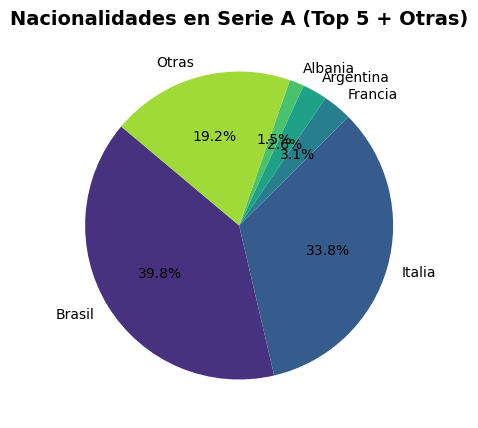

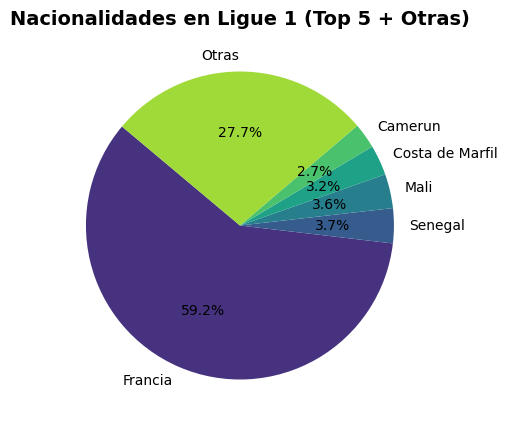

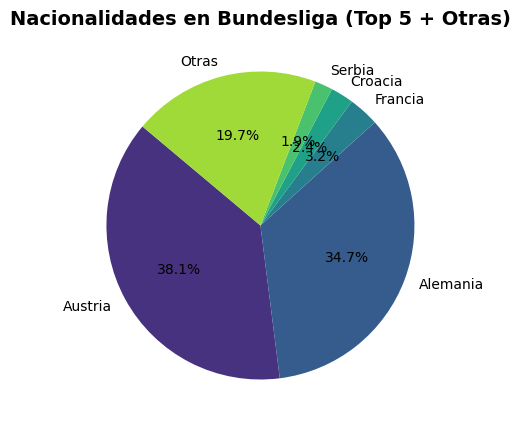

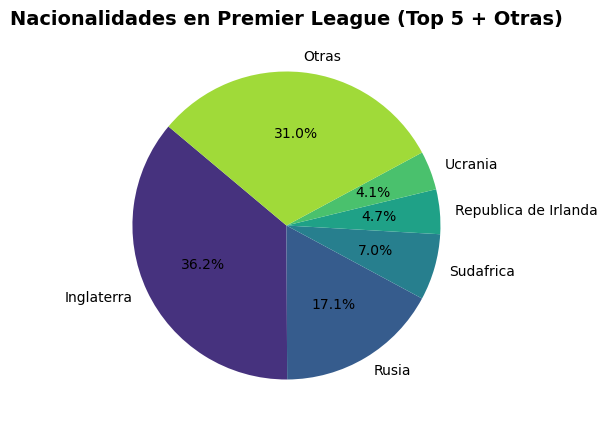

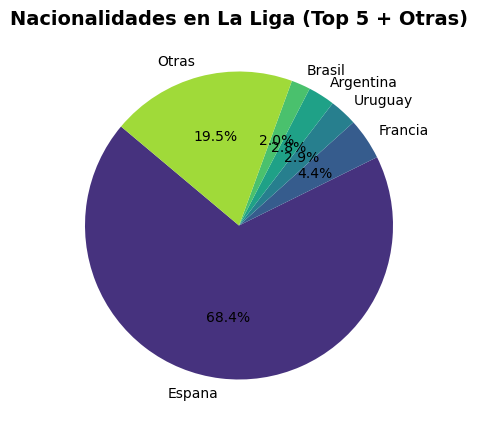

In [22]:
ligas_filtradas_actualizadas = ["Serie A", "Ligue 1", "Bundesliga", "Premier League", "La Liga"]
# Agrupar los datos por liga y nacionalidad y contar la cantidad de jugadores
nacionalidades_por_liga = data_filtrada.groupby(['nombre_liga_x', 'nacionalidad']).size().reset_index(name='cantidad')
# Filtrar solo las ligas seleccionadas
nacionalidades_por_liga_filtradas = nacionalidades_por_liga[nacionalidades_por_liga['nombre_liga_x'].isin(ligas_filtradas_actualizadas)]
# Crear gráficos de sectores para cada liga
for liga in ligas_filtradas_actualizadas:
    # Filtrar los datos para la liga actual
    datos_liga = nacionalidades_por_liga_filtradas[nacionalidades_por_liga_filtradas['nombre_liga_x'] == liga]
    # Ordenar y seleccionar las 5 nacionalidades principales
    datos_liga = datos_liga.sort_values(by='cantidad', ascending=False)
    top_5 = datos_liga.head(5)
    otras = datos_liga.iloc[5:].sum(numeric_only=True)['cantidad']
    # Agregar las "Otras" nacionalidades
    labels = top_5['nacionalidad'].tolist() + ['Otras']
    sizes = top_5['cantidad'].tolist() + [otras]
   # Crear una paleta viridis con colores para cada segmento
    viridis_palette = sns.color_palette('viridis', n_colors=len(labels))
    
    # Crear el gráfico de sectores
    plt.figure(figsize=(5, 5))
    plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=viridis_palette  # Aplicar la paleta viridis
    )
    plt.title(f'Nacionalidades en {liga} (Top 5 + Otras)', fontsize=14, fontweight='bold')
    plt.show()

## Evolucion de la Estadistica General

In [24]:
media_por_año = data_filtrada.groupby('version_x')['est_general_x'].mean()
print("Media por año:\n", media_por_año)

# Calcular la media para el conjunto de datos completo
media_total = data_filtrada['est_general_x'].mean()
print("Media total:", media_total)

Media por año:
 version_x
2015    61.012370
2016    62.686398
2017    63.297135
2018    63.495464
2019    63.340357
2020    63.254635
2021    62.712331
2022    62.827747
2023    62.909850
2024    62.945899
Name: est_general_x, dtype: float64
Media total: 62.85282350251486


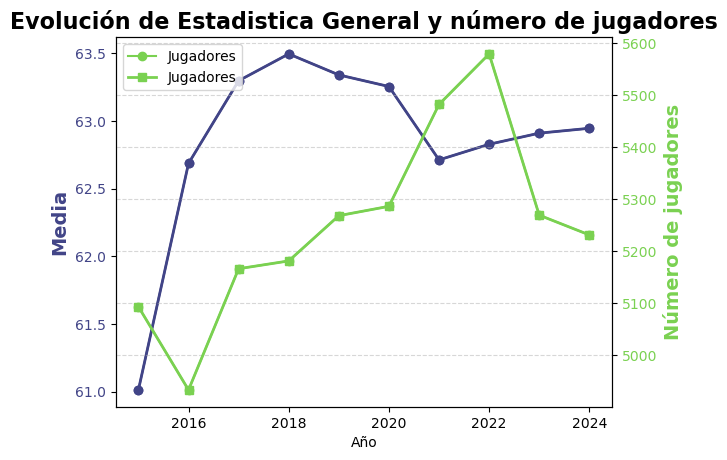

In [25]:
fig, ax1 = plt.subplots(facecolor='white')

cmap = cm.viridis
colors = cmap(np.linspace(0.2, 0.8, len(media_por_año)))  # Ajustar los límites
markers = ['o', 's', '^']  # Diferentes marcadores para cada línea
# Primer eje Y: Media
ax1.set_xlabel('Año')
ax1.set_ylabel('Media', color=colors[0])
ax1.plot(media_por_año.index, media_por_año.values, color=colors[0], label='Media', marker='o')
ax1.tick_params(axis='y', labelcolor=colors[0])

# Segundo eje Y: Número de jugadores
ax2 = ax1.twinx()
ax2.set_ylabel('Número de jugadores', color=colors[-1])
ax2.plot(media_por_año.index, jug_por_año, color=colors[-1], label='Jugadores', marker='o')
ax2.tick_params(axis='y', labelcolor=colors[-1])

ax1.plot(media_por_año.index, media_por_año.values, color=colors[0], label='Media', marker=markers[0], linewidth=2)
ax2.plot(media_por_año.index, jug_por_año, color=colors[-1], label='Jugadores', marker=markers[1], linewidth=2)
plt.grid(True, linestyle='--', alpha=0.5)  # Agregar una cuadrícula suave

# Agregar un título y etiquetas más grandes
plt.title('Evolución de Estadistica General y número de jugadores', fontsize=16, fontweight='bold')
ax1.set_ylabel('Media', color=colors[0], fontsize=14, fontweight='bold')
ax2.set_ylabel('Número de jugadores', color=colors[-1], fontsize=14, fontweight='bold')
# Mostrar leyenda
plt.legend()



## Top 5 de Posiciones 

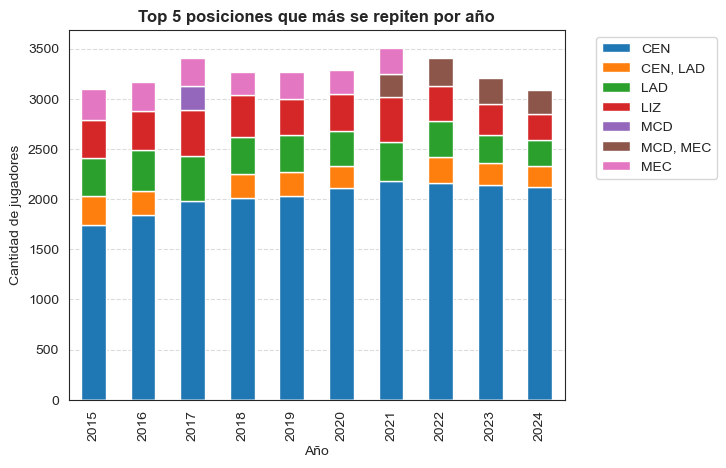

In [27]:
conteo_posiciones = data_filtrada.groupby(['version_x', 'posiciones']).size().reset_index(name='conteo')

# Ordenar por año y conteo descendentemente
conteo_posiciones = conteo_posiciones.sort_values(['version_x', 'conteo'], ascending=False)

# Obtener el top 5 por año
top5_por_ano = conteo_posiciones.groupby('version_x').head(5)

# Cambiar el estilo a 'white' para un fondo blanco sin cuadrícula
sns.set_style("white")

# Crear un gráfico de barras apiladas
top5_por_ano.pivot(index='version_x', columns='posiciones', values='conteo').plot(kind='bar', stacked=True)

plt.title('Top 5 posiciones que más se repiten por año', fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Cantidad de jugadores')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Posicion que más jugadores aporta

C:\Users\redon\AppData\Local\Temp\ipykernel_7592\3079520058.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='version_x', y='count', data=data, palette='viridis')


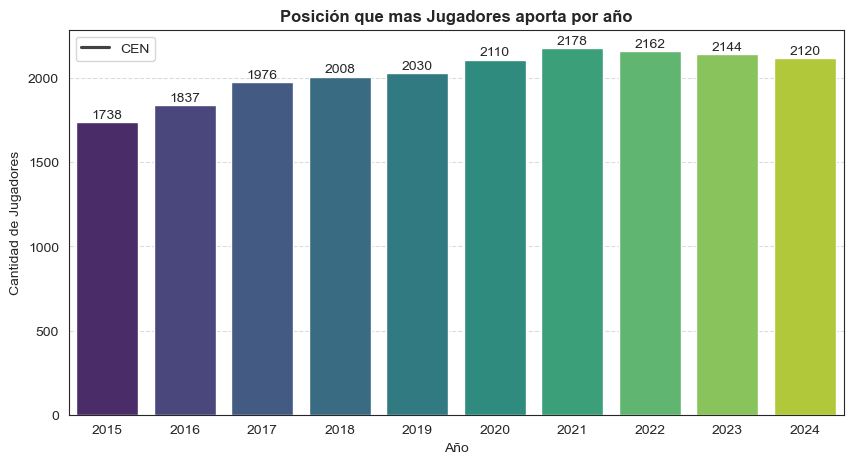

      version_x posiciones  count
8          2015        CEN   1738
239        2016        CEN   1837
447        2017        CEN   1976
640        2018        CEN   2008
858        2019        CEN   2030
1077       2020        CEN   2110
1293       2021        CEN   2178
1509       2022        CEN   2162
1744       2023        CEN   2144
1971       2024        CEN   2120


In [29]:
data = data_filtrada.groupby(['version_x', 'posiciones']).size().reset_index(name='count')

# Encontrar la posición más frecuente en cada año
data = data.loc[data.groupby('version_x')['count'].idxmax()]
data


sns.set_style("white")
sns.set_palette("viridis") 
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='version_x', y='count', data=data, palette='viridis')

# Agregar etiquetas a cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext=(0, 5), 
                   textcoords='offset points') 

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Posición que mas Jugadores aporta por año', fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Cantidad de Jugadores')
ax.legend(labels=["CEN"])
plt.show()

# Imprimir los resultados
print(data)

## Top 10 de las principales caracteristicas que destacan en los jugadores

### Defensa

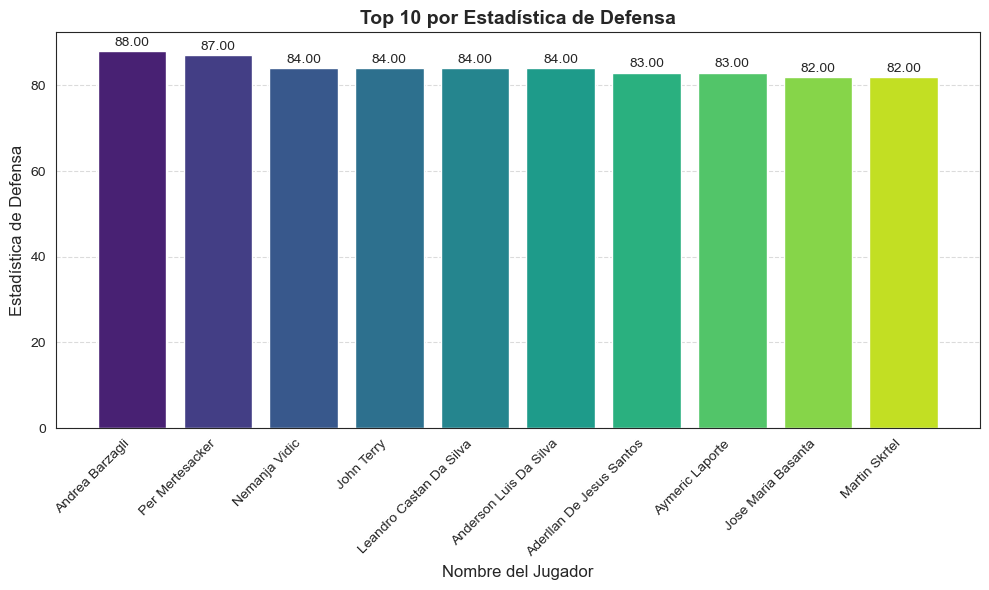

In [32]:
# Eliminar duplicados basados en la columna 'nombre_jugador', manteniendo el primero encontrado
data_filtradas = data_filtrada.drop_duplicates(subset=['nombre_jugador'])

# Asegurarnos de que no haya valores nulos en la columna 'defensa_x' antes de ordenar
data_filtradas = data_filtradas.dropna(subset=['defensa_x'])

# Ordenar por la estadística de defensa_x de mayor a menor y seleccionar los 10 mejores
top_10_estrellas_defensa = data_filtradas.sort_values(by="defensa_x", ascending=False).head(10)

# Crear colores con la paleta viridis
viridis_palette = sns.color_palette('viridis', n_colors=10)

# Crear el gráfico de barras verticales
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_estrellas_defensa['nombre_jugador'], top_10_estrellas_defensa['defensa_x'], color=viridis_palette)

# Título del gráfico
plt.title('Top 10 por Estadística de Defensa', fontsize=14, fontweight='bold')

# Añadir valores sobre cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra (valor de la estadística de defensa_x)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Posición del texto
             f'{yval:.2f}',  # Valor formateado con dos decimales
             ha='center', va='bottom', fontsize=10)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)

# Etiquetas
plt.xlabel('Nombre del Jugador', fontsize=12)
plt.ylabel('Estadística de Defensa', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Entrada

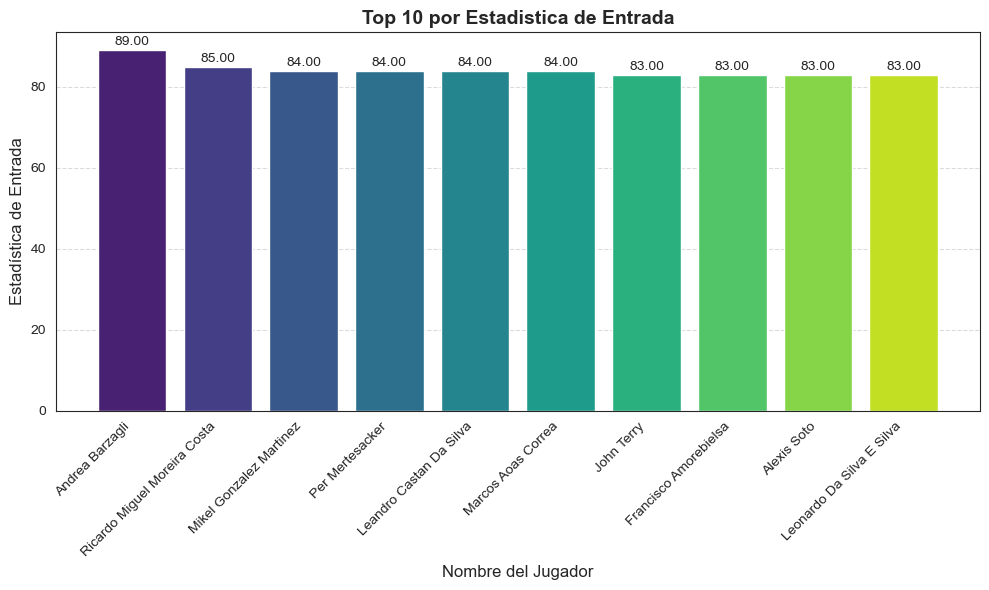

In [34]:
# Eliminar duplicados basados en la columna 'nombre_jugador', manteniendo el primero encontrado
data_filtradas = data_filtrada.drop_duplicates(subset=['nombre_jugador'])

# Asegurarnos de que no haya valores nulos en la columna 'entrada' antes de ordenar
data_filtradas = data_filtradas.dropna(subset=['entrada'])

# Ordenar por la estadística de entrada de mayor a menor y seleccionar los 10 mejores
top_10_estrellas_pase = data_filtradas.sort_values(by="entrada", ascending=False).head(10)

# Crear colores con la paleta viridis
viridis_palette = sns.color_palette('viridis', n_colors=10)

# Crear el gráfico de barras verticales
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_estrellas_pase['nombre_jugador'], top_10_estrellas_pase['entrada'], color=viridis_palette)

# Título del gráfico
plt.title('Top 10 por Estadistica de Entrada', fontsize=14, fontweight='bold')

# Añadir valores sobre cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra (valor de la estadística de entrada)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Posición del texto
             f'{yval:.2f}',  # Valor formateado con dos decimales
             ha='center', va='bottom', fontsize=10)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)

# Etiquetas
plt.xlabel('Nombre del Jugador', fontsize=12)
plt.ylabel('Estadística de Entrada', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Marcaje

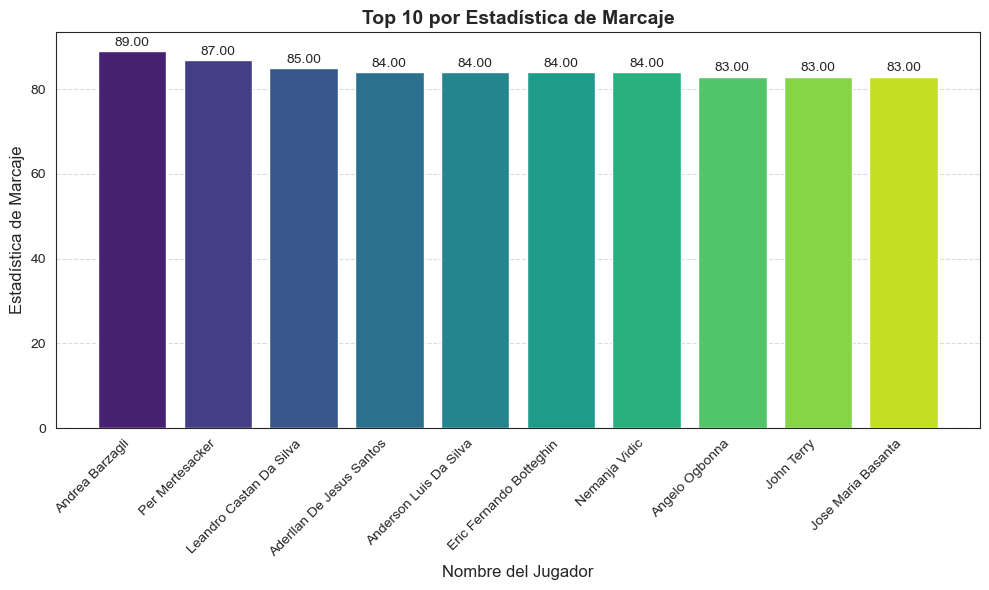

In [36]:
# Eliminar duplicados basados en la columna 'nombre_jugador', manteniendo el primero encontrado
data_filtradas = data_filtrada.drop_duplicates(subset=['nombre_jugador'])

# Asegurarnos de que no haya valores nulos en la columna 'marcaje' antes de ordenar
data_filtradas = data_filtradas.dropna(subset=['marcaje'])

# Ordenar por la estadística de marcaje de mayor a menor y seleccionar los 10 mejores
top_10_estrellas_marcaje = data_filtradas.sort_values(by="marcaje", ascending=False).head(10)

# Crear colores con la paleta viridis
viridis_palette = sns.color_palette('viridis', n_colors=10)

# Crear el gráfico de barras verticales
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_estrellas_marcaje['nombre_jugador'], top_10_estrellas_marcaje['marcaje'], color=viridis_palette)

# Título del gráfico
plt.title('Top 10 por Estadística de Marcaje', fontsize=14, fontweight='bold')

# Añadir valores sobre cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra (valor de la estadística de marcaje)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Posición del texto
             f'{yval:.2f}',  # Valor formateado con dos decimales
             ha='center', va='bottom', fontsize=10)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)

# Etiquetas
plt.xlabel('Nombre del Jugador', fontsize=12)
plt.ylabel('Estadística de Marcaje', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Anticipacion

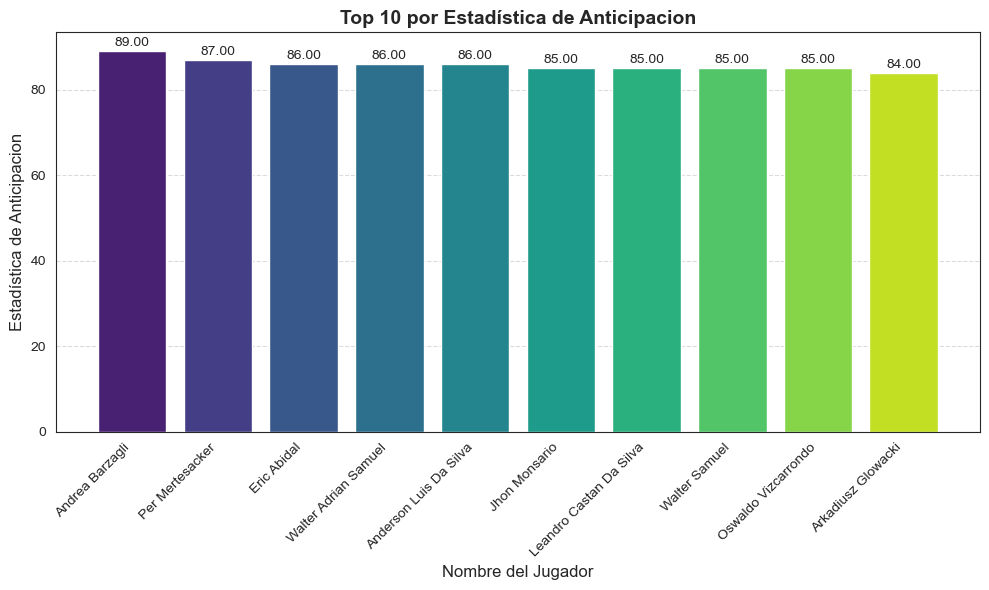

In [38]:
# Eliminar duplicados basados en la columna 'nombre_jugador', manteniendo el primero encontrado
data_filtradas = data_filtrada.drop_duplicates(subset=['nombre_jugador'])

# Asegurarnos de que no haya valores nulos en la columna 'marcaje' antes de ordenar
data_filtradas = data_filtradas.dropna(subset=['anticipacion'])

# Ordenar por la estadística de marcaje de mayor a menor y seleccionar los 10 mejores
top_10_estrellas_marcaje = data_filtradas.sort_values(by="anticipacion", ascending=False).head(10)

# Crear colores con la paleta viridis
viridis_palette = sns.color_palette('viridis', n_colors=10)

# Crear el gráfico de barras verticales
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_estrellas_marcaje['nombre_jugador'], top_10_estrellas_marcaje['anticipacion'], color=viridis_palette)

# Título del gráfico
plt.title('Top 10 por Estadística de Anticipacion', fontsize=14, fontweight= 'bold')

# Añadir valores sobre cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra (valor de la estadística de marcaje)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Posición del texto
             f'{yval:.2f}',  # Valor formateado con dos decimales
             ha='center', va='bottom', fontsize=10)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)

# Etiquetas
plt.xlabel('Nombre del Jugador', fontsize=12)
plt.ylabel('Estadística de Anticipacion', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Estadisticas individuales

C:\Users\redon\AppData\Local\Temp\ipykernel_7592\3868941464.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


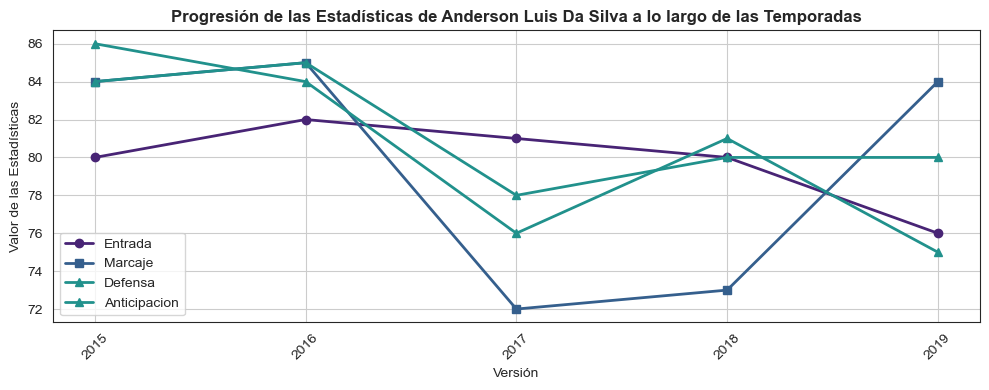

In [40]:
data_jugador = data_completa.loc[data_completa['nombre_jugador'] == 'Anderson Luis Da Silva']

# Asegurarnos de que no haya valores nulos en las columnas de las estadísticas de interés
data_jugador = data_jugador.dropna(subset=['entrada', 'marcaje', 'defensa_x', 'version_x'])

# Ordenar los datos por la columna 'version_x'
data_jugador = data_jugador.sort_values(by='version_x')

# Crear el gráfico de líneas
plt.figure(figsize=(10, 4))

# Obtener la paleta viridis
cmap = cm.get_cmap('viridis')

# Graficar cada estadística con colores de la paleta viridis
plt.plot(data_jugador['version_x'], data_jugador['entrada'], marker='o', label='Entrada', color=cmap(0.1), linestyle='-', linewidth=2, markersize=6)
plt.plot(data_jugador['version_x'], data_jugador['marcaje'], marker='s', label='Marcaje', color=cmap(0.3), linestyle='-', linewidth=2, markersize=6)
plt.plot(data_jugador['version_x'], data_jugador['defensa_x'], marker='^', label='Defensa', color=cmap(0.5), linestyle='-', linewidth=2, markersize=6)
plt.plot(data_jugador['version_x'], data_jugador['anticipacion'], marker='^', label='Anticipacion', color=cmap(0.5), linestyle='-', linewidth=2, markersize=6)

# Etiquetas y título
plt.xlabel('Versión')
plt.ylabel('Valor de las Estadísticas')
plt.title('Progresión de las Estadísticas de Anderson Luis Da Silva a lo largo de las Temporadas', fontweight= 'bold')

# Ajustar etiquetas del eje X para que no tengan decimales
xticks_labels = data_jugador['version_x'].astype(int)  # Convertir a enteros
plt.xticks(data_jugador['version_x'], labels=xticks_labels, rotation=45)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

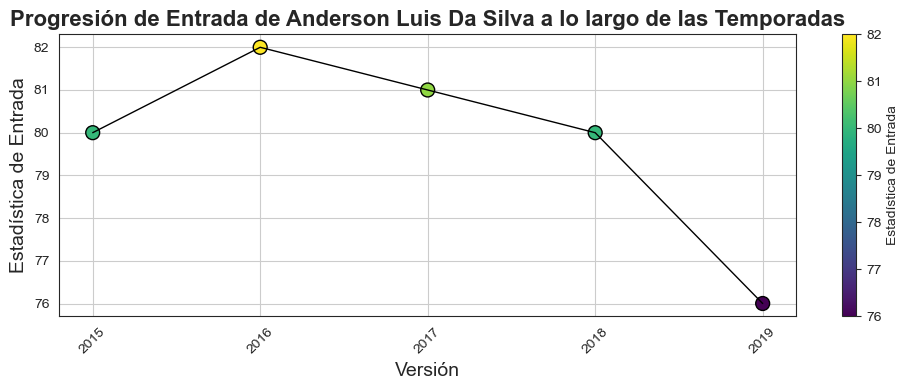

In [73]:
data_jugador = data_completa.loc[data_completa['nombre_jugador'] == 'Anderson Luis Da Silva']

# Asegurarnos de que no haya valores nulos en la columna 'entrada' y 'version_x'
data_jugador = data_jugador.dropna(subset=['entrada', 'version_x'])

# Ordenar los datos por versión para ver la progresión a lo largo del tiempo
data_jugador = data_jugador.sort_values(by='version_x')

# Crear un gradiente de colores con la paleta 'viridis'
norm = plt.Normalize(data_jugador['entrada'].min(), data_jugador['entrada'].max())
cmap = plt.get_cmap('viridis')

# Crear el gráfico de dispersión con color gradiente
plt.figure(figsize=(10,4))  # Aumentar el tamaño de la figura
sc = plt.scatter(data_jugador['version_x'], data_jugador['entrada'], c=data_jugador['entrada'], cmap=cmap, s=100, edgecolor='k', marker='o')

# Conectar los puntos con una línea
plt.plot(data_jugador['version_x'], data_jugador['entrada'], color='k', linestyle='-', linewidth=1)

# Etiquetas y título
plt.xlabel('Versión', fontsize=14)
plt.ylabel('Estadística de Entrada', fontsize=14)
plt.title('Progresión de Entrada de Anderson Luis Da Silva a lo largo de las Temporadas', fontsize=16, fontweight= 'bold')

# Añadir barra de color para indicar el valor del gradiente, formateando sin decimales
cbar = plt.colorbar(sc, label='Estadística de Entrada')
cbar.set_ticks([round(tick) for tick in cbar.get_ticks()])  # Eliminar decimales en la barra de color

# Ajustar etiquetas del eje X para que no tengan decimales
xticks_labels = data_jugador['version_x'].astype(int)  # Convertir a enteros
plt.xticks(data_jugador['version_x'], labels=xticks_labels, rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

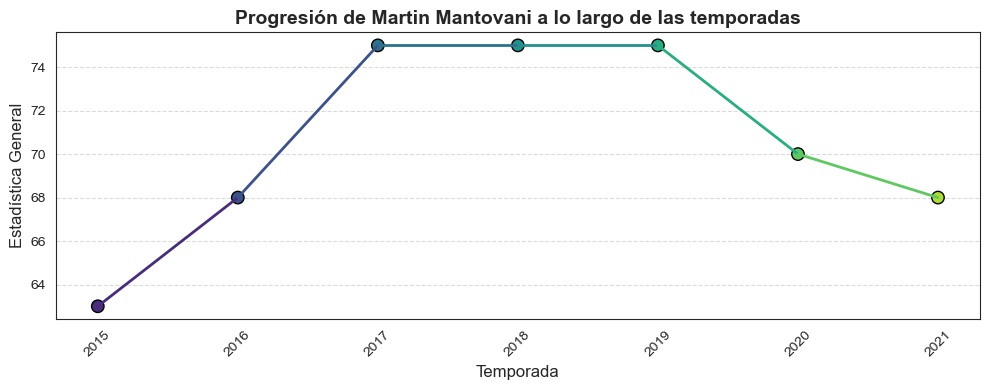

In [42]:
# Filtrar los datos para el jugador que contiene 'Martin Mantovani' en su nombre
jugador_datos = data_completa[
    data_completa['nombre_jugador'].str.contains('Martin Mantovani', case=False, na=False)
]

# Crear un mapa de colores basado en la paleta viridis
viridis_palette = sns.color_palette('viridis', n_colors=len(jugador_datos))
colors = viridis_palette

# Crear el gráfico de líneas para mostrar la progresión de Martin Mantovani a lo largo de las temporadas
plt.figure(figsize=(10, 4))

# Dibujar un gráfico con colores graduales para los puntos y la línea
for i in range(len(jugador_datos) - 1):
    plt.plot(
        jugador_datos['version_x'].iloc[i:i+2],
        jugador_datos['est_general_x'].iloc[i:i+2],
        color=colors[i],  # Colorear la línea de acuerdo a la temporada
        linewidth=2
    )

# Dibujar los puntos con los mismos colores graduales
plt.scatter(jugador_datos['version_x'], jugador_datos['est_general_x'], color=colors, s=80, edgecolor='black')

# Títulos y etiquetas
plt.title('Progresión de Martin Mantovani a lo largo de las temporadas', fontsize=14, fontweight= 'bold')
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Estadística General', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar la disposición del gráfico para que no se corten los elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()